# Medicaid Expansion Decision

## Importing Packages

In [1]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

## Reading Data

In [2]:
medicaid_e_d=pd.read_csv('/Users/sumeetmishra/desktop/medicaid_expansion_decision.csv')
medicaid_e_d.head(15)

,Location,Current Status of Medicaid Expansion Decision,Adoption Date
0,Alabama,Not Adopted,NaN
1,Alaska,Adopted,09/01/15
2,Arizona,Adopted,01/01/14
3,Arkansas,Adopted,01/01/14
4,California,Adopted,01/01/14
5,Colorado,Adopted,01/01/14
6,Connecticut,Adopted,01/01/14
7,Delaware,Adopted,01/01/14
8,District of Columbia,Adopted,01/01/14
9,Florida,Not Adopted,NaN


## Looking at Data types

In [3]:
medicaid_e_d.dtypes

Location                                         object
Current Status of Medicaid Expansion Decision    object
Adoption Date                                    object
dtype: object

## Checking if any missing values

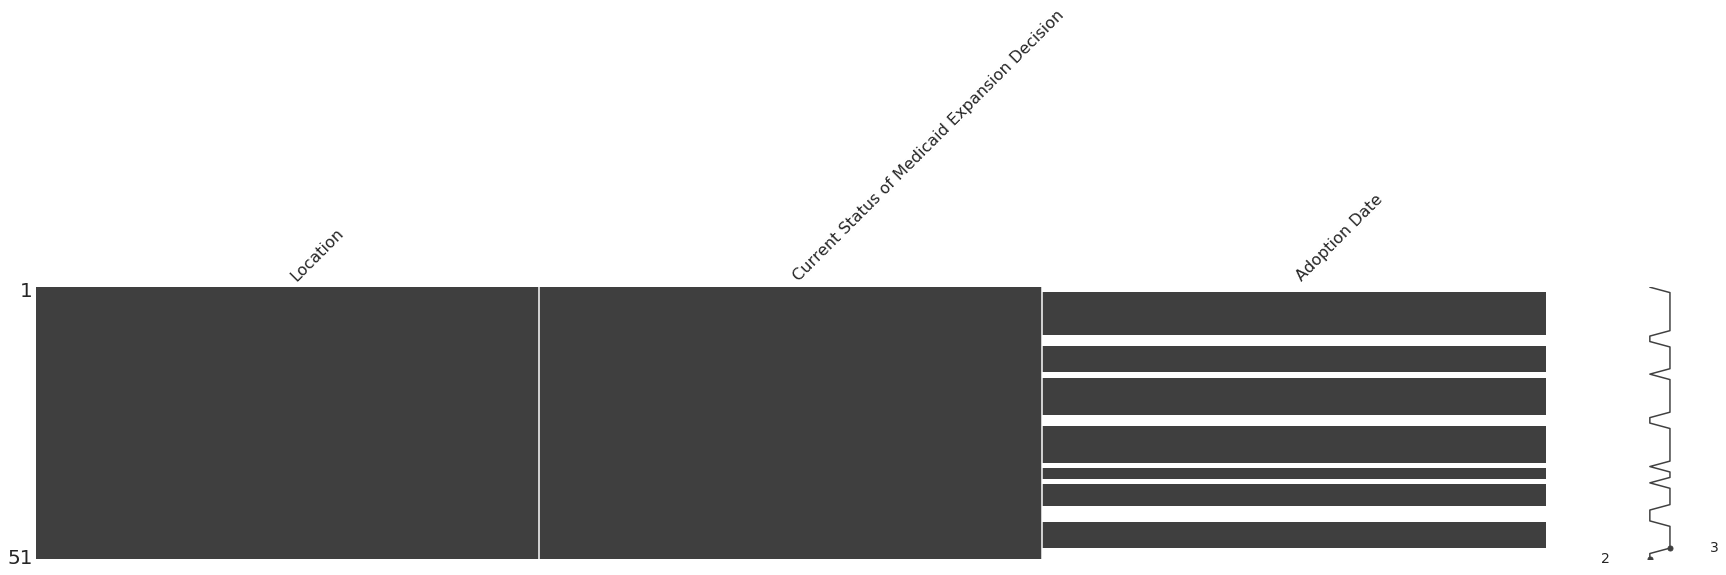

In [4]:
missingno.matrix(medicaid_e_d, figsize = (30,5))

## Plotting histogram for Current Status of Medicaid Expansion Decision

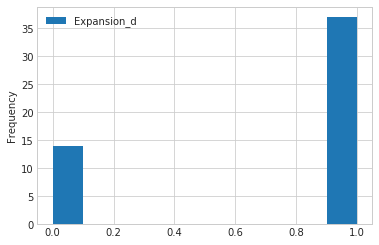

In [5]:
medicaid_e_d['Expansion_d'] =medicaid_e_d['Current Status of Medicaid Expansion Decision']
vals_to_replace = {'Adopted':'1', 'Not Adopted':'0'}
medicaid_e_d['Expansion_d'] = medicaid_e_d['Expansion_d'].map(vals_to_replace)
medicaid_e_d['Expansion_d'].astype(int)
medicaid_e_d[["Expansion_d"]] = medicaid_e_d[["Expansion_d"]].apply(pd.to_numeric)

medicaid_e_d.plot.hist()

## Data Exploration-Univariate

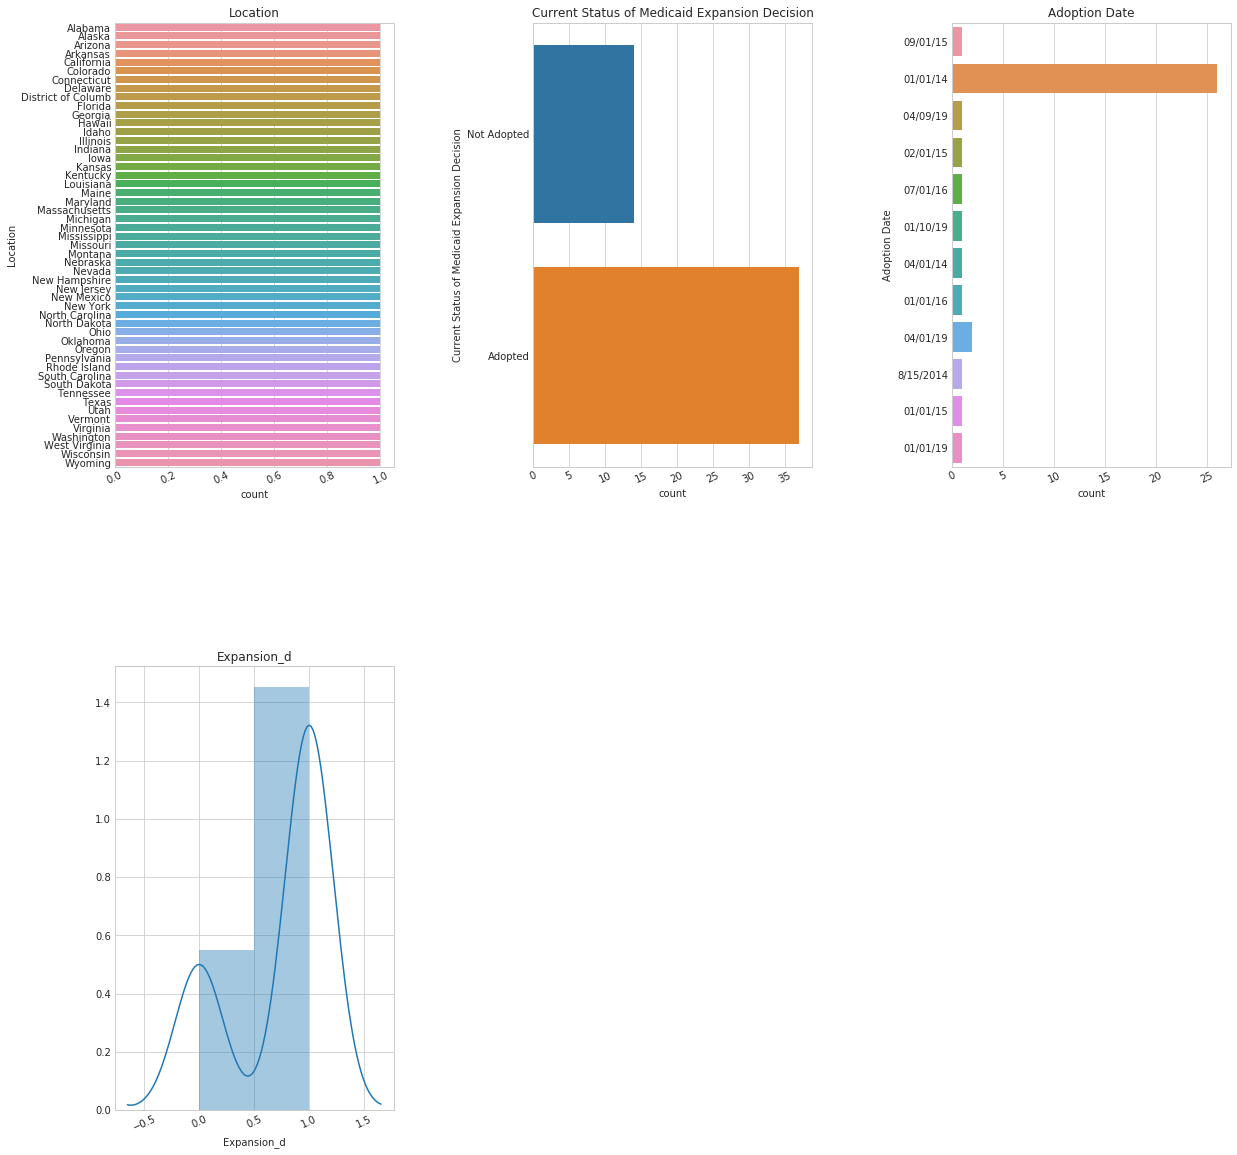

In [6]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
plot_distribution(medicaid_e_d, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

## Pictorial Representation of Medicaid Adopted,Not Adopted and Adopted but not Implemented

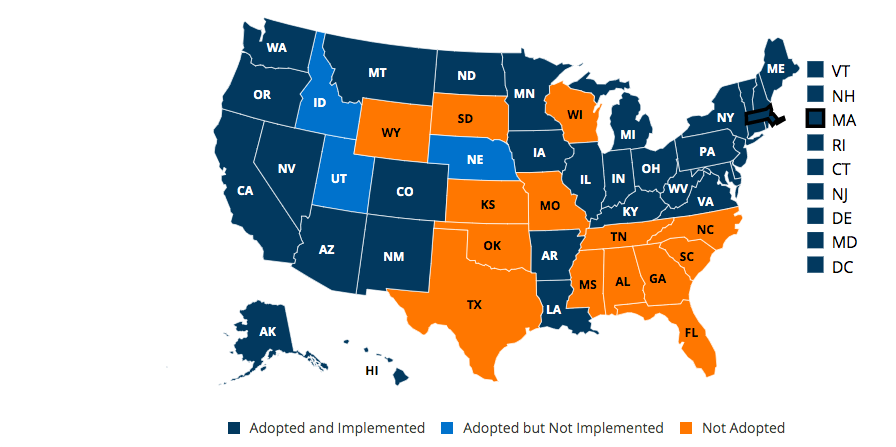

In [7]:
#from PIL import Image
from IPython.display import Image
Image(filename='/Users/sumeetmishra/desktop/medicaid_expansion.png',width=800,height=800)